# Home Loan Analysis

***

## Import Libraries

In [1]:
import numpy as np
from numpy import count_nonzero, median, mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

#Plotly
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

import datetime
from datetime import datetime, timedelta

# import eli5
# from IPython.display import display

#import os
#import zipfile
import scipy.stats
from collections import Counter

import sklearn
# from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
# from sklearn.linear_model import LinearRegression, LogisticRegression, ElasticNet, Lasso, Ridge
# from sklearn.model_selection import cross_val_score, train_test_split
# from sklearn.metrics import accuracy_score, auc, classification_report, confusion_matrix, f1_score
# from sklearn.metrics import plot_confusion_matrix, plot_roc_curve

# from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, LogisticRegression, Ridge
# from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, ExtraTreeClassifier, ExtraTreeRegressor, plot_tree
# from sklearn.svm import SVC, SVR, LinearSVC, LinearSVR
# from sklearn.naive_bayes import GaussianNB, MultinomialNB

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

# Use Feature-Engine library
#import feature_engine
#from feature_engine import imputation as mdi
#from feature_engine.outlier_removers import Winsorizer
#from feature_engine import categorical_encoders as ce
#from feature_engine.discretisation import EqualWidthDiscretiser, EqualFrequencyDiscretiser
#from feature_engine.discretisation import ArbitraryDiscretiser, DecisionTreeDiscretiser
#from feature_engine.encoding import OrdinalEncoder

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Exploratory Data Analysis

In [2]:
df = pd.read_csv("Home Loan Data.csv")

In [3]:
df

,ID,LocationCode,Minority,Medianincome,Annualincome,IncomeRatio,FirstTimeBuyer,Age,DebttoIncomeRatio,HomeValue,Borrowed,LTVratio,Length,InterestRate
0,1,53,29.57,91700,123000,1.34,2,< 25,10,385000,195000,50.65,360,2.75
1,2,6,90.76,83300,250000,3.00,2,< 25,30,535000,505000,95.00,360,3.50
2,3,34,64.19,96500,64000,0.66,2,< 25,43,375000,105000,28.55,180,2.50
3,4,51,34.58,124900,141000,1.13,2,< 25,46,665000,345000,51.51,180,2.25
4,5,39,17.93,84600,109000,1.29,1,< 25,30,405000,325000,80.00,180,2.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,37,40.28,80100,275000,3.43,2,> 74,20,755000,505000,90.00,360,2.62
496,497,8,14.48,100000,79000,0.79,2,> 74,20,425000,315000,73.85,360,3.00
497,498,17,10.96,69300,187000,2.70,2,> 74,10,325000,145000,43.75,180,2.87
498,499,26,33.82,79700,109000,1.37,2,> 74,20,525000,385000,73.46,360,3.62


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 500 non-null    int64  
 1   LocationCode       500 non-null    int64  
 2   Minority           500 non-null    float64
 3   Medianincome       500 non-null    int64  
 4   Annualincome       500 non-null    int64  
 5   IncomeRatio        500 non-null    float64
 6   FirstTimeBuyer     500 non-null    int64  
 7   Age                500 non-null    object 
 8   DebttoIncomeRatio  500 non-null    int64  
 9   HomeValue          500 non-null    int64  
 10  Borrowed           500 non-null    int64  
 11  LTVratio           500 non-null    float64
 12  Length             500 non-null    int64  
 13  InterestRate       500 non-null    float64
dtypes: float64(4), int64(9), object(1)
memory usage: 54.8+ KB


In [5]:
df.describe()

,ID,LocationCode,Minority,Medianincome,Annualincome,IncomeRatio,FirstTimeBuyer,DebttoIncomeRatio,HomeValue,Borrowed,LTVratio,Length,InterestRate
count,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00
mean,250.50,25.47,28.32,85300.20,127626.00,1.53,1.89,30.30,434760.00,286080.00,70.69,322.92,3.24
std,144.48,16.55,23.67,15779.26,105177.42,1.37,0.32,12.07,253340.69,139004.60,16.77,70.25,0.55
min,1.00,1.00,1.49,52300.00,18000.00,0.21,1.00,10.00,35000.00,25000.00,12.06,120.00,1.87
25%,125.75,8.00,10.47,74875.00,69750.00,0.84,2.00,20.00,265000.00,185000.00,60.00,360.00,2.87
50%,250.50,25.00,19.66,83300.00,105500.00,1.23,2.00,30.00,360000.00,265000.00,74.30,360.00,3.12
75%,375.25,39.25,39.59,95450.00,155250.00,1.88,2.00,41.00,555000.00,375000.00,80.00,360.00,3.50
max,500.00,55.00,98.95,139800.00,1560000.00,22.07,2.00,50.00,1915000.00,765000.00,97.00,360.00,6.00


In [6]:
df.columns

Index(['ID', 'LocationCode', 'Minority', 'Medianincome', 'Annualincome', 'IncomeRatio', 'FirstTimeBuyer', 'Age', 'DebttoIncomeRatio', 'HomeValue', 'Borrowed', 'LTVratio', 'Length', 'InterestRate'], dtype='object')

### Groupby Function

In [8]:
df.groupby("LocationCode")["Annualincome","HomeValue"].mean().head()

,Annualincome,HomeValue
LocationCode,,
1,130166.67,428333.33
2,66000.00,315000.00
4,98937.50,381250.00
5,127428.57,269285.71
6,152437.50,676000.00


In [9]:
df.groupby("Age")["Annualincome","HomeValue"].mean()

,Annualincome,HomeValue
Age,,
25 to 34,140080.00,447600.00
35 to 44,129525.18,468021.58
45 to 54,108484.54,399329.90
55 to 64,134534.09,429204.55
65 to 74,108366.67,380166.67
< 25,167297.87,463085.11
> 74,109368.42,466578.95


In [10]:
df.groupby("FirstTimeBuyer")["Annualincome","HomeValue"].mean()

,Annualincome,HomeValue
FirstTimeBuyer,,
1,97428.57,324285.71
2,131434.68,448693.69


## Data Visualization

### Univariate Data Exploration

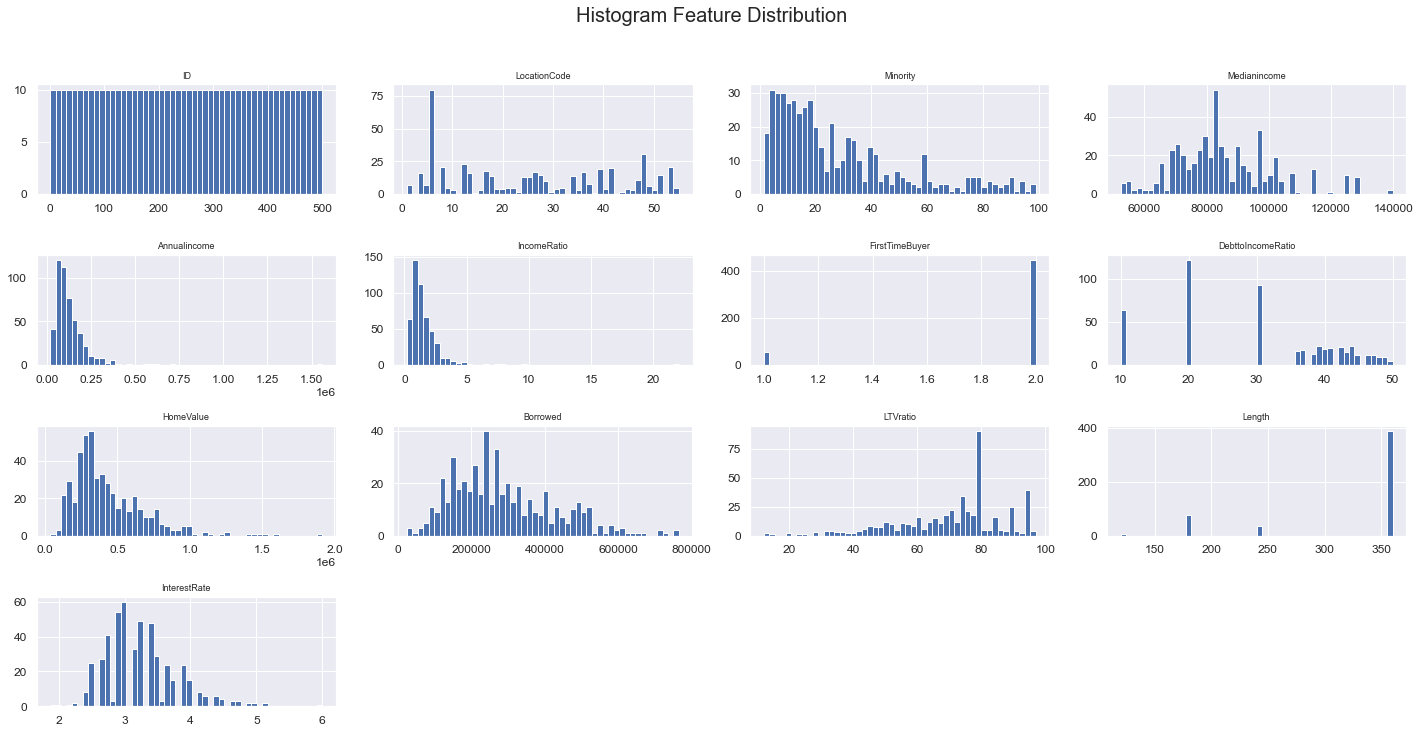

In [11]:
df.hist(bins=50, figsize=(20,10))
plt.suptitle('Histogram Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)

plt.tight_layout()
plt.show()

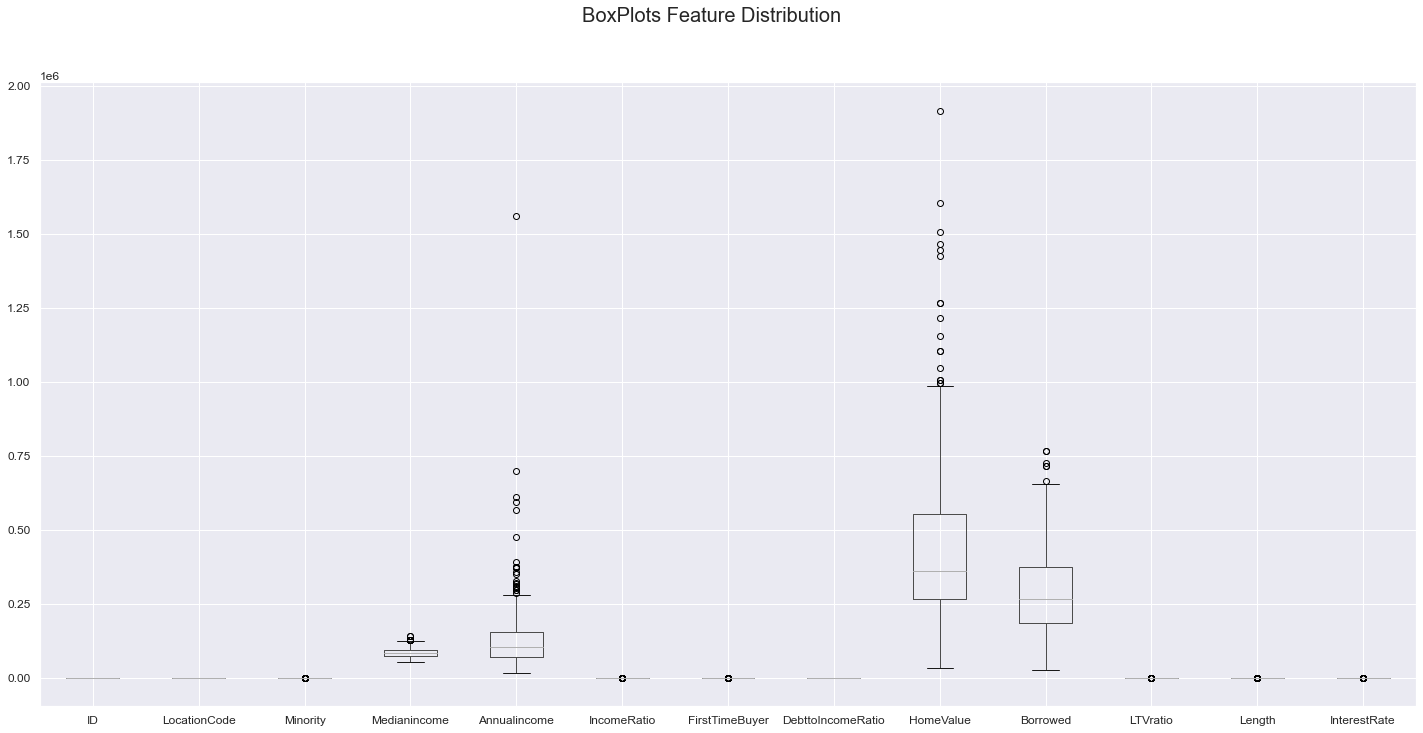

In [12]:
df.boxplot(figsize=(20,10))
plt.suptitle('BoxPlots Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)

plt.tight_layout()
plt.show()

In [ ]:
# Plot 4 rows and 1 column (can be expanded)

fig, ax = plt.subplots(4,1, sharex=False, figsize=(16,16))
fig.suptitle('Main Title')


sns.barplot(x="", y="", data=df, ax=ax[0])
ax[0].set_title('Title of the first chart')
#ax[0].tick_params('x', labelrotation=45)
ax[0].set_xlabel("")
ax[0].set_ylabel("")

sns.barplot(x="", y="", data=df, ax=ax[1])
ax[1].set_title('Title of the second chart')
#ax[1].tick_params('x', labelrotation=45)
ax[1].set_xlabel("")
ax[1].set_ylabel("")

sns.barplot(x="", y="", data=df, ax=ax[2])
ax[2].set_title('Title of the third chart')
#ax[2].tick_params('x', labelrotation=45)
ax[2].set_xlabel("")
ax[2].set_ylabel("")

sns.barplot(x="", y="", data=df, ax=ax[3])
ax[3].set_title('Title of the fourth chart')
#ax[3].tick_params('x', labelrotation=45)
ax[3].set_xlabel("")
ax[3].set_ylabel("")

plt.tight_layout()
plt.show()

In [ ]:
# Plot 1 rows and 2 columns (can be expanded)

fig, ax = plt.subplots(1,2, sharex=False, figsize=(16,5))
fig.suptitle('Main Title')

sns.countplot(x="", data=df, hue=, ax=ax[0])
ax[0].set_title('Title of the first chart')
ax[0].tick_params('x', labelrotation=45)
ax[0].set_xlabel("")
ax[0].set_ylabel("")

sns.countplot(x="", data=df, hue=, ax=ax[1])
ax[1].set_title('Title of the second chart')
ax[1].tick_params('x', labelrotation=45)
ax[1].set_xlabel("")
ax[1].set_ylabel("")


plt.tight_layout()
plt.show()

In [ ]:
#Plot 2 by 2 subplots

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, sharex=False, figsize=(20,20))
fig.suptitle('Main Title', y=0.5)

sns.countplot(x="", data=df, ax=ax1)
ax1.set_title('Title of the first chart', size=20)
#ax1.tick_params('x', labelrotation=45)
ax1.set_xlabel("")
ax1.set_ylabel("")

sns.countplot(x="", data=df, ax=ax2)
ax2.set_title('Title of the second chart', size=20)
#ax2.tick_params('x', labelrotation=45)
ax2.set_xlabel("")
ax2.set_ylabel("")

sns.countplot(x="", data=df, ax=ax3)
ax3.set_title('Title of the third chart', size=20)
#ax3.tick_params('x', labelrotation=45)
ax3.set_xlabel("")
ax3.set_ylabel("")

sns.countplot(x="", data=df, ax=ax4)
ax4.set_title('Title of the fourth chart', size=20)
#ax4.tick_params('x', labelrotation=45)
ax4.set_xlabel("")
ax4.set_ylabel("")

plt.tight_layout()
plt.show()

In [ ]:
fig = plt.figure(figsize=(20,40))

plt.subplot(4,2,1)
plt.title("", size=20)
sns.countplot()
plt.xlabel("")
plt.ylabel("")

plt.subplot(4,2,2)
plt.title("", size=20)
sns.barplot()
plt.xlabel("")
plt.ylabel("")

plt.subplot(4,2,3)
plt.title("", size=20)
sns.scatterplot()
plt.xlabel("")
plt.ylabel("")

plt.subplot(4,2,4)
plt.title("", size=20)
sns.boxplot()
plt.xlabel("")
plt.ylabel("")

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(20,20))


g = sns.catplot(x='', hue = '', row = '',
            kind='count', data=ratings_df,
            height = 3, aspect = 1)

g.set_xlabels("")
g.set_ylabels("")
#g = (g.set_axis_labels("Tip","Total bill(USD)").set(xlim=(0,10),ylim=(0,100)


g.set(xlim=(0,None))
g.set_xticklabels(rotation=90)

plt.suptitle('', x=0.5, y=1.02, ha='center', fontsize=20)

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(20,20))

sns.catplot(x="calories", y="restaurant",

                hue="is_salad", ci=None,

                data=df_calories, color=None, linewidth=3, showfliers = False,

                orient="h", height=20, aspect=1, palette=None,

                kind="box", dodge=True)

plt.xlabel("", size=20)
plt.ylabel("", size=20)
plt.suptitle('', x=0.5, y=1.02, ha='center', fontsize=20)

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(20,20))

sns.relplot(x="age", y="eval", hue="gender",
            row="tenure",
            data=ratings_df, height = 3, aspect = 2)

plt.xlabel("", size=20)
plt.ylabel("", size=20)
plt.suptitle('', x=0.5, y=1.02, ha='center', fontsize=20)

plt.tight_layout()
plt.show()

#### Python code done by Dennis Lam